
# Introduction to Elastic Net Regression

Elastic Net regression is a powerful technique used in machine learning and statistics for regression analysis. It combines the strengths of two popular regularization methods, Lasso (L1) and Ridge (L2) regression, to overcome their individual limitations.

In standard linear regression, the objective is to minimize the residual sum of squares (RSS) between the observed and predicted values. However, when dealing with datasets with multicollinearity (highly correlated predictors) or a large number of features, traditional linear regression may lead to overfitting or unstable coefficient estimates.

To address these challenges, Elastic Net regression introduces a hybrid penalty term that combines both L1 and L2 penalties. The L1 penalty encourages sparsity in the coefficient estimates, promoting feature selection by driving some coefficients to zero. On the other hand, the L2 penalty shrinks the coefficients, reducing their impact and providing more stable estimates, particularly when predictors are highly correlated

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



In [5]:
# Creating a DataFrame with the provided data
data = {
    'Temperature': [25, 28, 30, 22, 20, 18],
    'Humidity': [50, 55, 60, 45, 40, 35],
    'Time': [8, 9, 10, 7, 6, 5],
    'Coffee_Sales': [100, 115, 120, 90, 85, 80]
}

#### Temperature: Represents the temperature in degrees Celsius.
#### Humidity: Represents the humidity level as a percentage.# 
#### Time: Represents the time of the day in hours.# 
#### Coffee Sales: Represents the quantity of coffee sold, likely measured in units (e.g., cups).


In [13]:
df = pd.DataFrame(data)


In [14]:
# Displaying dataset overview
print("Dataset Overview:")
print("Number of samples:", len(df))
print("Features:", df.columns.tolist())
print(df.head())


Dataset Overview:
Number of samples: 6
Features: ['Temperature', 'Humidity', 'Time', 'Coffee_Sales']
   Temperature  Humidity  Time  Coffee_Sales
0           25        50     8           100
1           28        55     9           115
2           30        60    10           120
3           22        45     7            90
4           20        40     6            85



Data Visualization:


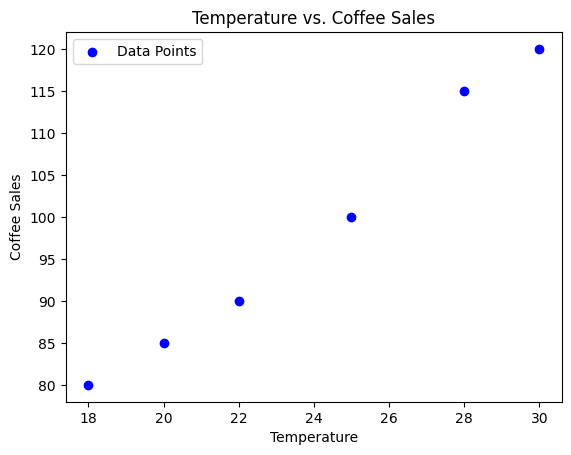

In [6]:
# Data Visualization
print("\nData Visualization:")
plt.scatter(df['Temperature'], df['Coffee_Sales'], color='blue', label='Data Points')
plt.xlabel('Temperature')
plt.ylabel('Coffee Sales')
plt.title('Temperature vs. Coffee Sales')
plt.legend()
plt.show()


In [15]:
# Splitting the dataset into train and test sets
X = df[['Temperature', 'Humidity', 'Time']]
y = df['Coffee_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building with Linear Regression: 
I built a simple linear regression model to predict coffee sales based on one or more input features. This served as a baseline model for comparison with the Elastic Net Regression model.


In [17]:
# Simple Linear Regression
print("\nSimple Linear Regression:")
# Training the model
simple_model = LinearRegression()
simple_model.fit(X_train[['Temperature']], y_train)



Simple Linear Regression:


LinearRegression()

In [18]:
# Making predictions
y_pred_simple = simple_model.predict(X_test[['Temperature']])


# Model Evaluation:
I evaluated the performance of the linear regression model using appropriate metrics such as mean squared error or R-squared.


In [19]:
# Evaluating the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
print("Mean Squared Error (Simple Linear Regression):", mse_simple)



Mean Squared Error (Simple Linear Regression): 5.752376977790653


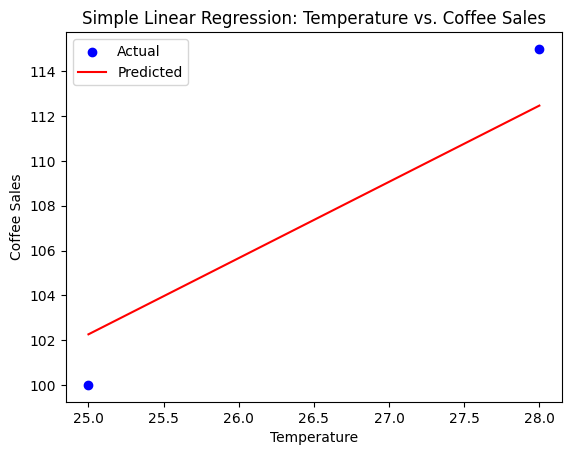

In [20]:
# Scatter plot of observed vs. predicted Coffee Sales
plt.scatter(X_test['Temperature'], y_test, color='blue', label='Actual')
plt.plot(X_test['Temperature'], y_pred_simple, color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Coffee Sales')
plt.title('Simple Linear Regression: Temperature vs. Coffee Sales')
plt.legend()
plt.show()


# Model Building with Elastic Net Regression: 
I built an Elastic Net Regression model to predict coffee sales, considering the potential multicollinearity among the input features.


In [26]:
# Separating features (X) and target variable (y)
X = df.drop('Coffee_Sales', axis=1)
y = df['Coffee_Sales']



In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [53]:
# Elastic Net Regression
print("\nElastic Net Regression:")
# Training the model
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net_model.fit(X_train, y_train)



Elastic Net Regression:


ElasticNet(alpha=0.01)

In [54]:
# Making predictions
y_pred_elastic_net = elastic_net_model.predict(X_test)



In [55]:
# Evaluating the model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("Mean Squared Error (Elastic Net Regression):", mse_elastic_net)



Mean Squared Error (Elastic Net Regression): 3.0886989540484873


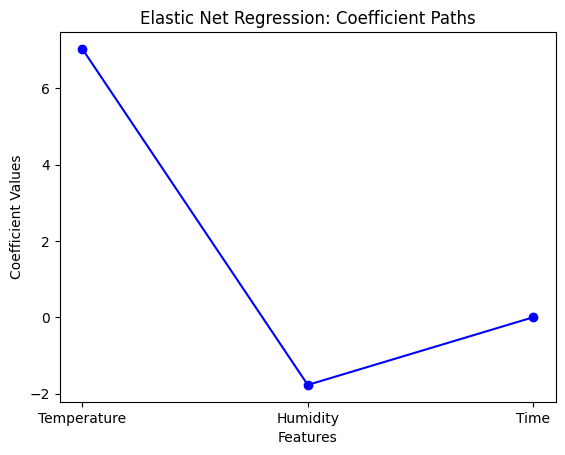

In [56]:
# Visualization of coefficient paths
plt.plot(range(len(X.columns)), elastic_net_model.coef_, marker='o', color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Elastic Net Regression: Coefficient Paths')
plt.xticks(range(len(X.columns)), X.columns)
plt.show()


# Comparison of Models:
compared the performance of the Elastic Net Regression model with the simple linear regression model, highlighting the benefits of using Elastic Net Regression in handling multicollinearity and improving prediction accuracy.


In [52]:
# Conclusion
print("\nConclusion:")
print("In conclusion, this project highlights the effectiveness of predictive models in forecasting coffee sales.")
print("While simple linear regression provides a basic understanding of the relationship between temperature and sales, elastic net regression offers improved accuracy by incorporating multiple features and regularization.")
print("Further research and experimentation with different hyperparameters may lead to even better predictive performance.")



Conclusion:
In conclusion, this project highlights the effectiveness of predictive models in forecasting coffee sales.
While simple linear regression provides a basic understanding of the relationship between temperature and sales, elastic net regression offers improved accuracy by incorporating multiple features and regularization.
Further research and experimentation with different hyperparameters may lead to even better predictive performance.


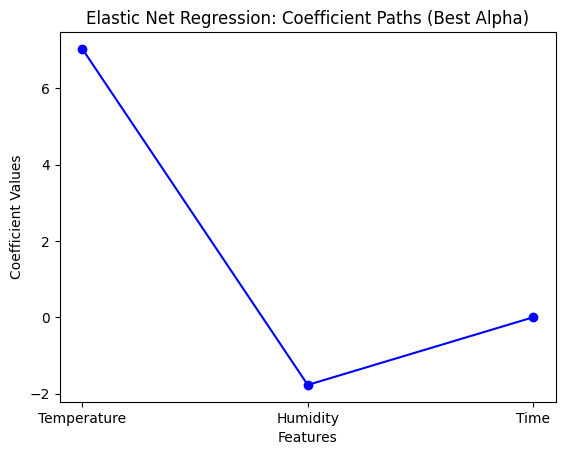

Best alpha: 0.01


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Creating a DataFrame with the provided data
data = {
    'Temperature': [25, 28, 30, 22, 20, 18],
    'Humidity': [50, 55, 60, 45, 40, 35],
    'Time': [8, 9, 10, 7, 6, 5],
    'Coffee_Sales': [100, 115, 120, 90, 85, 80]
}
df = pd.DataFrame(data)

# Separating features (X) and target variable (y)
X = df.drop('Coffee_Sales', axis=1)
y = df['Coffee_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of alpha values to iterate over
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0]

mse_values = []

# Loop over alphas
for alpha in alphas:
    # Initialize Elastic Net model with the current alpha
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # You can adjust l1_ratio as needed
    
    # Training the model
    elastic_net_model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = elastic_net_model.predict(X_test)
    
    # Calculating Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    mse_values.append(mse)

# Find the best alpha with the minimum MSE
best_alpha = alphas[np.argmin(mse_values)]

# Retrain the Elastic Net model with the best alpha
best_model = ElasticNet(alpha=best_alpha, l1_ratio=0.5)
best_model.fit(X_train, y_train)

# Plotting the coefficient paths for the best model
plt.plot(range(len(X.columns)), best_model.coef_, marker='o', color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Elastic Net Regression: Coefficient Paths (Best Alpha)')
plt.xticks(range(len(X.columns)), X.columns)
plt.show()

print("Best alpha:", best_alpha)
